[Download DATASETS from here](https://drive.google.com/drive/folders/1cBv9fiBQE2PedVPvTu56tOMIOtJTjTj1?usp=sharing)

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
plasma = pd.read_csv('plasma\metabolic tests\plasma(Specific Metabolics).csv')
serum = pd.read_csv('serum\metabolic tests\serum(Specific Metabolics).csv')
plasma.head()
plasma = plasma.drop('Unnamed: 0', axis=1)
serum = serum.drop('Unnamed: 0', axis=1)

In [3]:
labels = np.reshape(plasma.Class.to_numpy(), (82,1))

# PCA, tSNE & Other Functions
## PCA

In [4]:
from sklearn.decomposition import PCA
def pca_analysis(df, n_components):
    pca = PCA(n_components=n_components)
    pca_result = pca.fit_transform(df.iloc[:, :-1].values)

    pca_concatenate = np.concatenate([pca_result, labels], axis=1)

    return pca_concatenate

In [5]:
def make_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'pc{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [6]:
def plotting(pca_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))
    fig.suptitle("Principal Component Analysis",fontsize=20)

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'PC{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'PC{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = pca_df.Class == target
                axes[i, j-1].scatter(pca_df.loc[indicesToKeep, f'pc{i+1}']
                                , pca_df.loc[indicesToKeep, f'pc{j+1}'], c = color, s = 50)
    fig.legend(targets,prop={'size': 15}, loc='upper right')

## t-SNE

In [7]:
from sklearn.manifold import TSNE
def tsne_analysis(df, n_components):
    tsne = TSNE(n_components=n_components)
    tsne_result = tsne.fit_transform(df.iloc[:, :-1].values)

    tsne_concatenate = np.concatenate([tsne_result, labels], axis=1)

    return tsne_concatenate

In [8]:
def tsne_dataframe(array, n_features):
    col = []
    for i in range(1, n_features+1):
        col.append(f'tsne{i}')
    col.append('Class')
    return pd.DataFrame(array, columns = col)

In [9]:
def tsne_plotting(tsne_df, n_components):
    fig, axes = plt.subplots(nrows=n_components-1, ncols=4, figsize=(20, 8))
    fig.suptitle("t-SNE",fontsize=20)

    for i in range(n_components):
        for j in range(i+1, n_components):
            if j==n_components:
                break
            axes[i, j-1].set_xlabel(f'TSNE{i+1}',fontsize=20)
            axes[i, j-1].set_ylabel(f'TSNE{j+1}',fontsize=20)
            for target, color in zip(targets,colors):
                indicesToKeep = tsne_df.Class == target
                axes[i, j-1].scatter(tsne_df.loc[indicesToKeep, f'tsne{i+1}']
                                , tsne_df.loc[indicesToKeep, f'tsne{j+1}'], c = color, s = 50)
    fig.legend(targets,prop={'size': 15}, loc='upper right')

## Plasma

In [10]:
pca2_plasma = pca_analysis(plasma, 2)

pca2_plasma_df = make_dataframe(pca2_plasma, 2)
# print(pca2_plasma_df.head)

<Figure size 432x288 with 0 Axes>

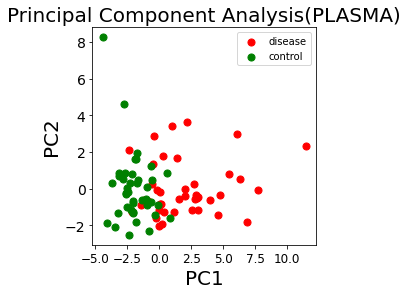

In [11]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis(PLASMA)",fontsize=20)
targets = ['disease', 'control']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca2_plasma_df.Class == target
    plt.scatter(pca2_plasma_df.loc[indicesToKeep, 'pc1']
               , pca2_plasma_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 10})

In [12]:
pca3_plasma = pca_analysis(plasma, 3)

pca3_plasma_df = make_dataframe(pca3_plasma, 3)
# print(pca3_df.head)

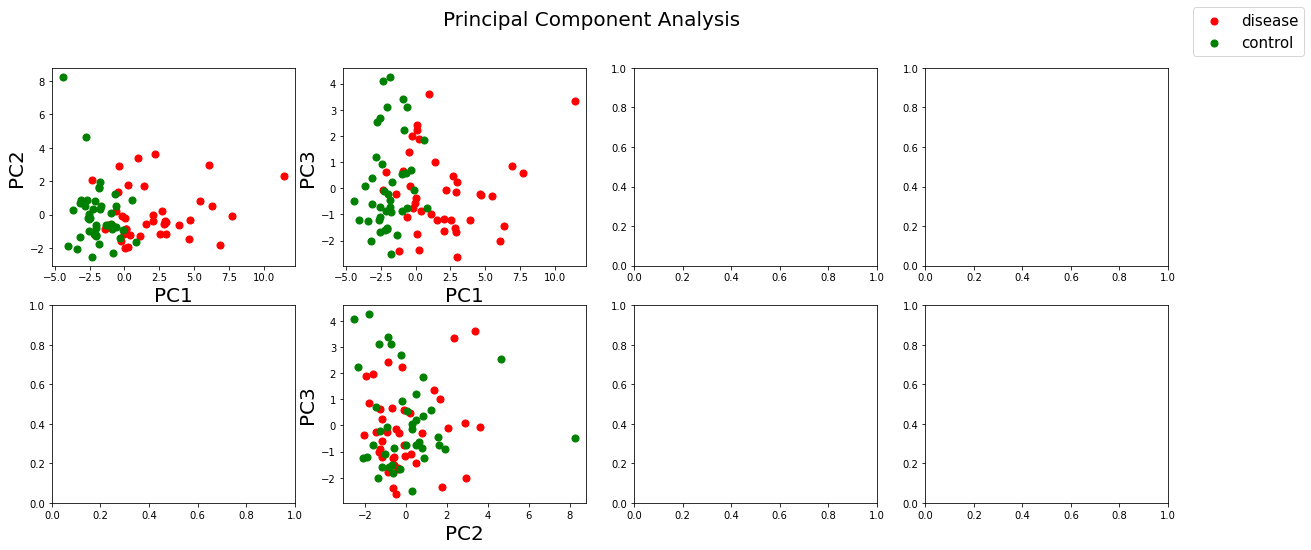

In [13]:
plotting(pca3_plasma_df, 3)

In [14]:
pca4_plasma = pca_analysis(plasma, 4)

pca4_plasma_df = make_dataframe(pca4_plasma, 4)
# print(pca4_plasma_df.head)

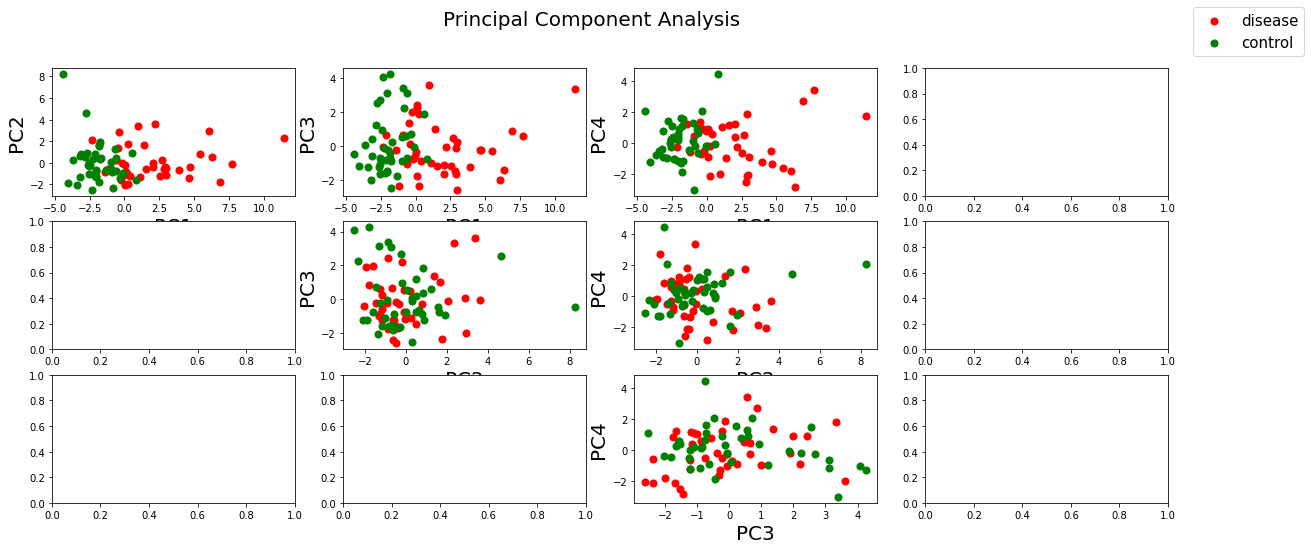

In [15]:
plotting(pca4_plasma_df, 4)

In [16]:
pca5_plasma = pca_analysis(plasma, 5)

pca5_plasma_df = make_dataframe(pca5_plasma, 5)
# print(pca5_df.head)

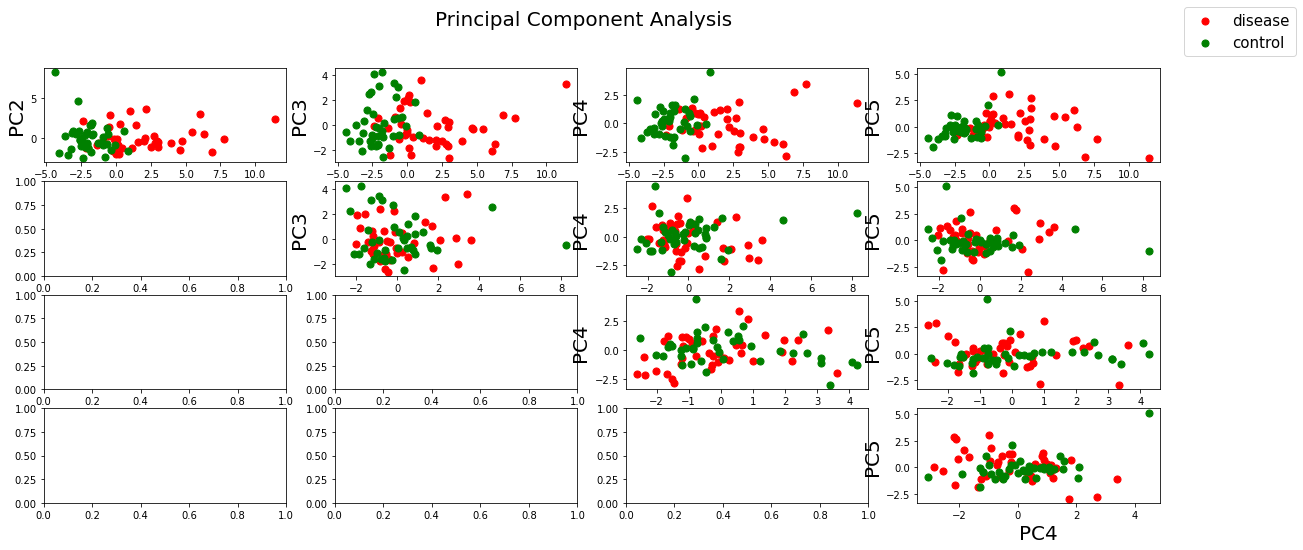

In [17]:
plotting(pca5_plasma_df, 5)

In [18]:
# now do PCA for 10, 15, 20
pca10_plasma = pca_analysis(plasma, 10)
pca10_plasma_df = make_dataframe(pca10_plasma, 10)

pca15_plasma = pca_analysis(plasma, 15)
pca15_plasma_df = make_dataframe(pca15_plasma, 15)

pca20_plasma = pca_analysis(plasma, 20)
pca20_plasma_df = make_dataframe(pca20_plasma, 20)
# print(pca20_plasma.head)

In [19]:
# pca15_plasma_df.to_csv("plasma/pca15_plasma_metabolics.csv")

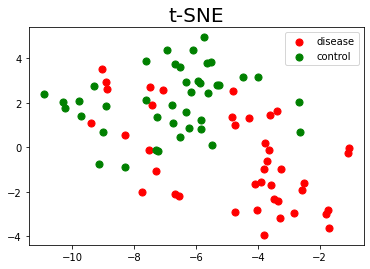

In [20]:
tsne2_plasma = tsne_analysis(plasma, 2)

tsne2_plasma_df = tsne_dataframe(tsne2_plasma, 2)
# print(tsne2_plasma_df.head)
# plotting(tsne2_plasma_df, 1, 1)
plt.title("t-SNE",fontsize=20)

for target, color in zip(targets,colors):
    indicesToKeep = tsne2_plasma_df.Class == target
    plt.scatter(tsne2_plasma_df.loc[indicesToKeep, 'tsne1']
               , tsne2_plasma_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)
plt.legend(targets,prop={'size': 10})

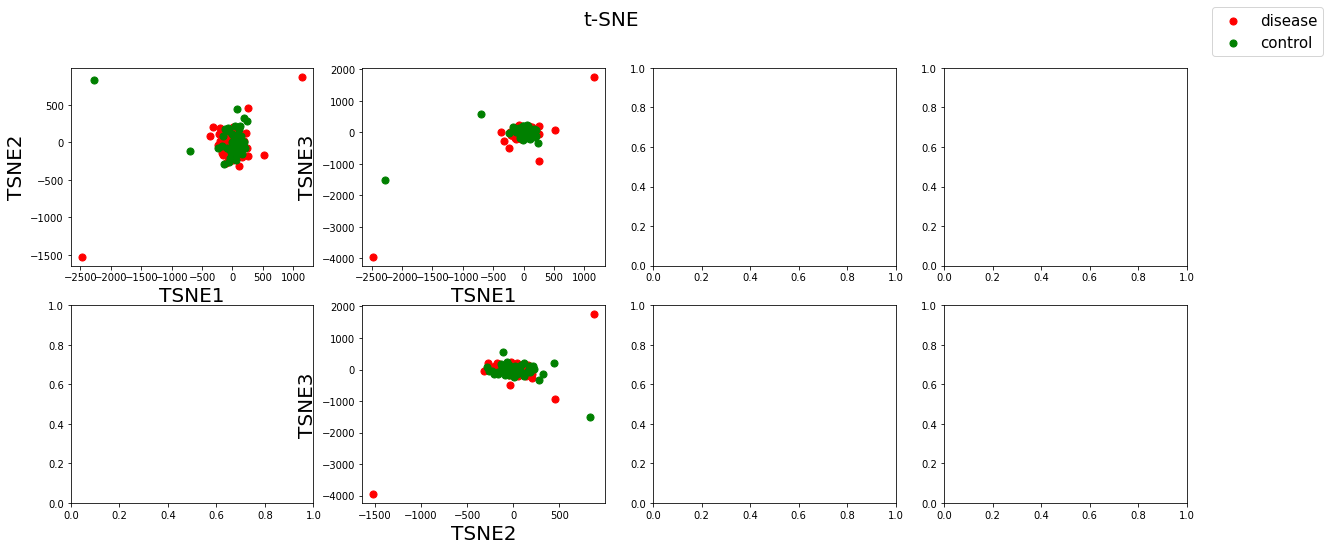

In [21]:
tsne3_plasma = tsne_analysis(plasma, 3)

tsne3_plasma_df = tsne_dataframe(tsne3_plasma, 3)
# print(tsne2_plasma_df.head)
tsne_plotting(tsne3_plasma_df, 3)


In [22]:
# tsne2_plasma_df.to_csv('plasma/tsne2_plasma_metabolics.csv')

## Serum

In [23]:
pca2_serum = pca_analysis(serum, 2)

pca2_serum_df = make_dataframe(pca2_serum, 2)
print(pca2_serum_df.head)

<bound method NDFrame.head of           pc1       pc2    Class
0   0.0546194  -1.48065  disease
1     1.05728  -1.52758  disease
2    0.826877  -1.97051  disease
3    0.411985  -1.74226  disease
4    -2.01118   2.21965  disease
..        ...       ...      ...
77   -1.92186  -2.03251  control
78    1.12067  0.712575  control
79   -1.64188 -0.319015  control
80   -1.32905  -1.34815  control
81   -0.98107  -0.42365  control

[82 rows x 3 columns]>


<Figure size 432x288 with 0 Axes>

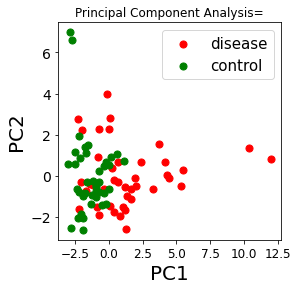

In [24]:
plt.figure()
plt.figure(figsize=(4, 4))
plt.xticks(fontsize=12)
plt.yticks(fontsize=14)
plt.xlabel('PC1',fontsize=20)
plt.ylabel('PC2',fontsize=20)
plt.title("Principal Component Analysis=",fontsize=12)
targets = ['disease', 'control']
colors = ['r', 'g']
for target, color in zip(targets,colors):
    indicesToKeep = pca2_serum_df.Class == target
    plt.scatter(pca2_serum_df.loc[indicesToKeep, 'pc1']
               , pca2_serum_df.loc[indicesToKeep, 'pc2'], c = color, s = 50)

plt.legend(targets,prop={'size': 15})

In [25]:
pca3_serum = pca_analysis(serum, 3)

pca3_serum_df = make_dataframe(pca3_serum, 3)
# print(pca3_df.head)

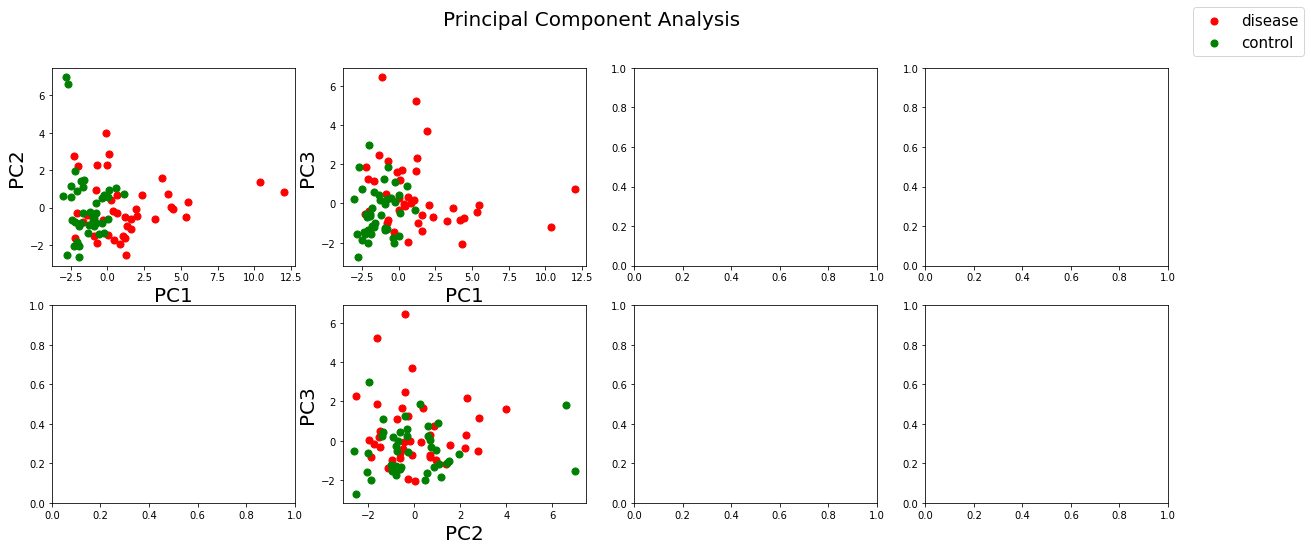

In [26]:
plotting(pca3_serum_df, 3)

In [27]:
pca4_serum = pca_analysis(serum, 4)

pca4_serum_df = make_dataframe(pca4_serum, 4)
# print(pca4_serum_df.head)

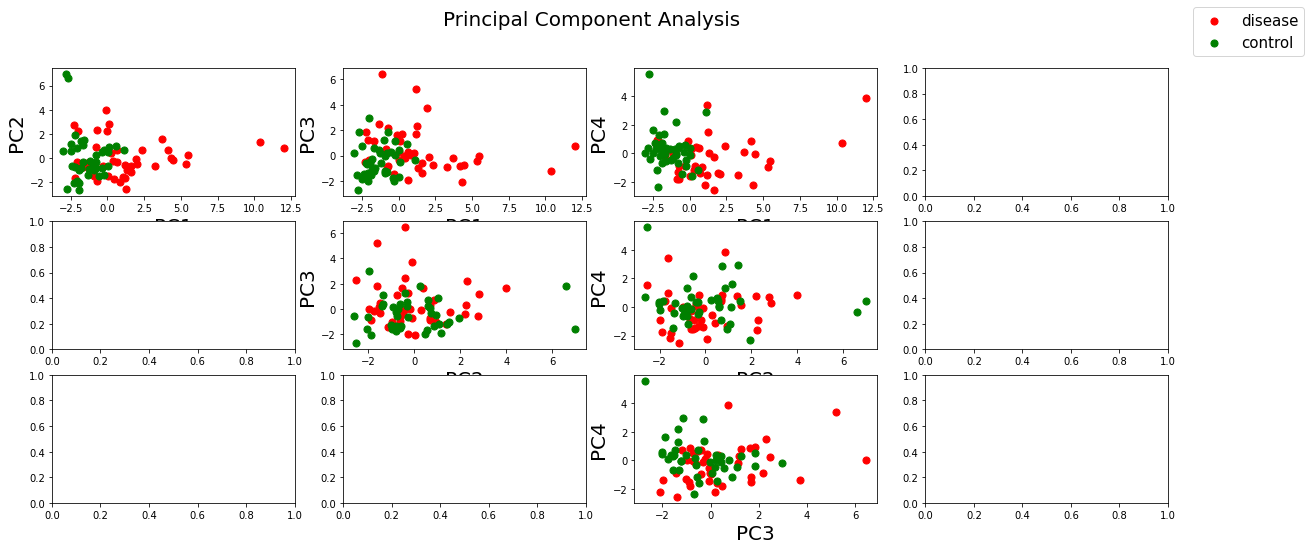

In [28]:
plotting(pca4_serum_df, 4)

In [29]:
pca5_serum = pca_analysis(serum, 5)

pca5_serum_df = make_dataframe(pca5_serum, 5)
# print(pca5_serum_df.head)

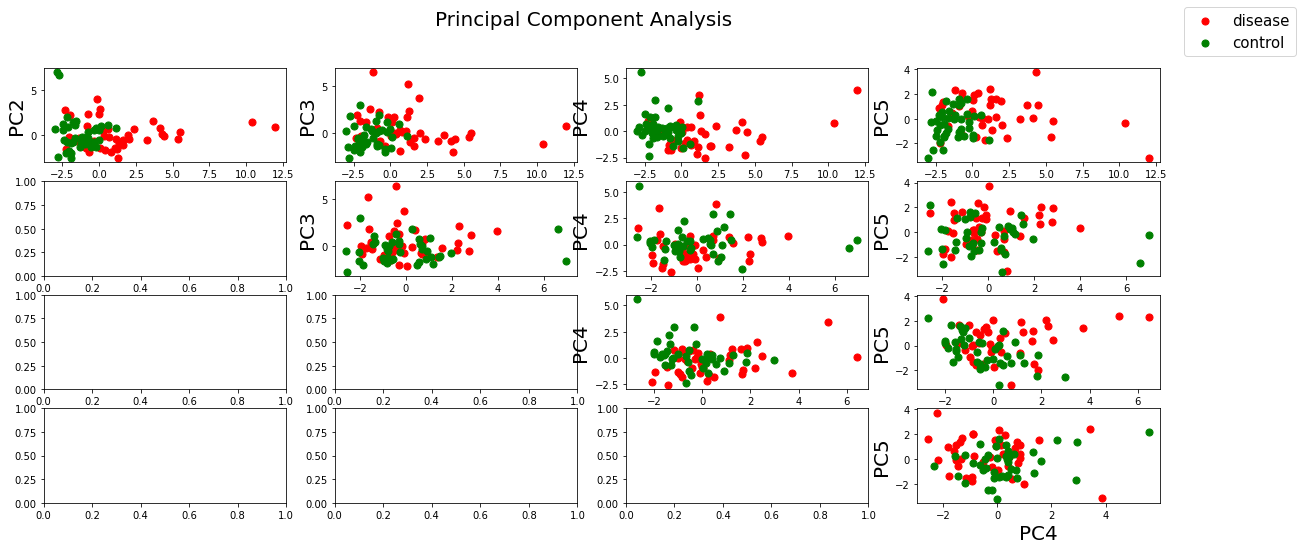

In [30]:
plotting(pca5_serum_df, 5)

In [31]:
# now do PCA for 10, 15, 20
pca10_serum = pca_analysis(serum, 10)
pca10_serum_df = make_dataframe(serum, 10)

pca15_serum = pca_analysis(serum, 15)
pca15_serum_df = make_dataframe(pca15_serum, 15)

pca20_serum = pca_analysis(serum, 20)
pca20_serum_df = make_dataframe(pca20_serum, 20)
# print(pca20_serum.head)

In [32]:
# pca15_serum_df.to_csv("serum/pca15_serum_metabolics.csv")

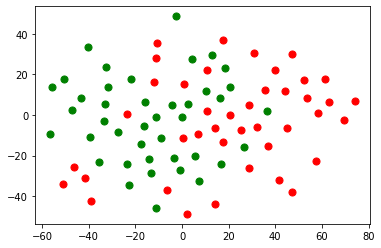

In [33]:
tsne2_serum = tsne_analysis(serum, 2)

tsne2_serum_df = tsne_dataframe(tsne2_serum, 2)
# print(tsne2_serum_df.head)
# plotting(tsne2_serum_df, 1, 1)

for target, color in zip(targets,colors):
    indicesToKeep = tsne2_serum_df.Class == target
    plt.scatter(tsne2_serum_df.loc[indicesToKeep, 'tsne1']
               , tsne2_serum_df.loc[indicesToKeep, 'tsne2'], c = color, s = 50)

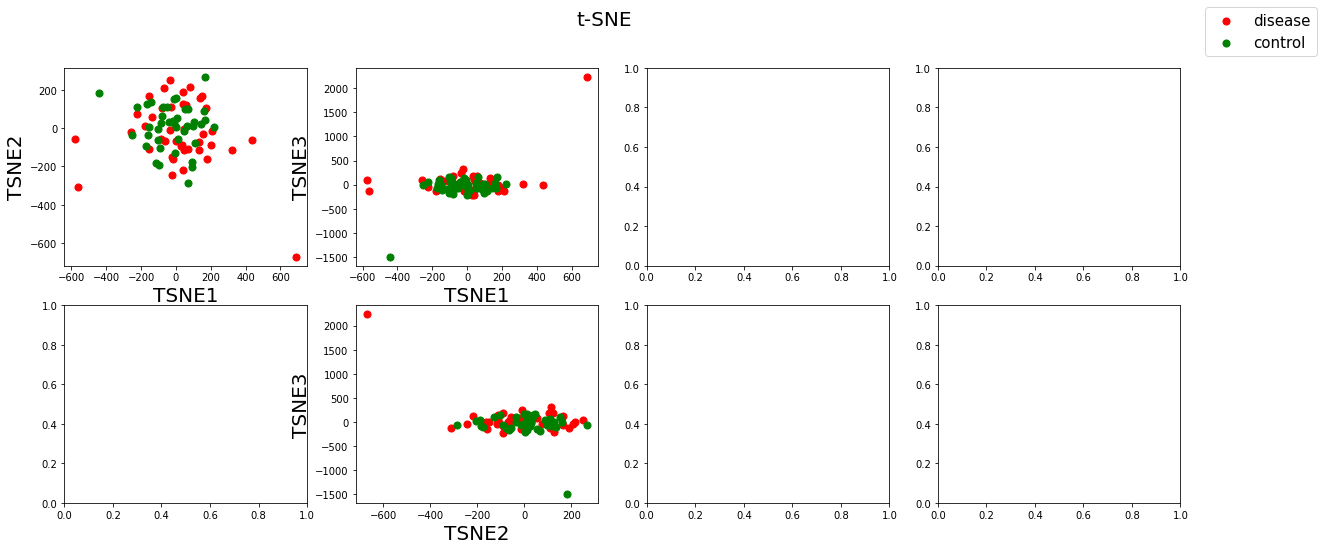

In [34]:
tsne3_serum = tsne_analysis(serum, 3)

tsne3_serum_df = tsne_dataframe(tsne3_serum, 3)
# print(tsne3_serum_df.head)
tsne_plotting(tsne3_serum_df, 3)


In [35]:
# tsne2_serum_df.to_csv('plasma/tsne2_serum_metabolics.csv')

# Models

In [36]:
# !pip install lazypredict

In [37]:
import lazypredict
from lazypredict.Supervised import LazyClassifier

from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import classification_report

from sklearn.model_selection import ShuffleSplit, train_test_split, StratifiedKFold

C:\Users\UTSHAB\AppData\Roaming\Python\Python37\site-packages\sklearn\utils\deprecation.py:143: FutureWarning: The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.
  warnings.warn(message, FutureWarning)


In [38]:
def get_xy(df):
  X = df.drop('Class', axis=1)
  X = X.apply(pd.to_numeric)
  y = df['Class'].copy()
  y = y.map({"control": 0, "disease": 1})
  return X, y

In [39]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler, LabelEncoder

In [40]:
pca2_plasma_df.dtypes

pc1      object
pc2      object
Class    object
dtype: object

In [41]:
# # make the independent variables float type
# pca2_plasma_df['Class'].map({"control": 0, "disease": 1})
# plasma = pca2_plasma_df.apply(pd.to_numeric)
# plasma

In [42]:
accuracy = []
for k in [0, 2, 3, 4, 5, 15, 20]:
    if k==0:
        name = ['Plasma(Specific Metabolics)', 'Serum(Specific Metabolics)']
        dfs = [plasma, serum]
    else:
        name = [f'pca{k}_plasma(Specific Metabolics)', f'pca{k}_serum(Specific Metabolics)']
        dfs = [vars()[f'pca{k}_plasma_df'], vars()[f'pca2_serum_df']]
    
    random_state = 42

    for idx, data in enumerate(dfs):
      result = []
      X, y = get_xy(data)
      rs = ShuffleSplit(n_splits=10, test_size=.2, random_state=random_state)
      raw_x = X
      for train_index, test_index in rs.split(X):
        clf = LazyClassifier(verbose=0, ignore_warnings=True, custom_metric=matthews_corrcoef, predictions=True)
        X_train, X_test = X.iloc[train_index], X.iloc[test_index]
        y_train, y_test = y.iloc[train_index], y.iloc[test_index]
    #     print(X_train, X_test, y_train, y_test)

        models, predictions = clf.fit(X_train, X_test, y_train, y_test)
        result.append(models)
    #     print(result)

      acc = []
      for i in range(10):
    #     print(result[i].iloc[0]['Balanced Accuracy'])
        acc.append(result[i].iloc[0]['Balanced Accuracy'])

      print(f'\n{name[idx]}: {sum(acc)/len(acc)}')
      accuracy.append([f'{name[idx]}', f'{sum(acc)/len(acc)}'])

  3%|▎         | 1/29 [00:00<00:03,  7.24it/s]


Plasma(Specific Metabolics): 0.8820318570318569


  7%|▋         | 2/29 [00:00<00:01, 17.54it/s]


Serum(Specific Metabolics): 0.9286761849261849


  7%|▋         | 2/29 [00:00<00:01, 18.02it/s]


pca2_plasma(Specific Metabolics): 0.8960372960372961


  3%|▎         | 1/29 [00:00<00:03,  8.62it/s]


pca2_serum(Specific Metabolics): 0.8873300310800311


  7%|▋         | 2/29 [00:00<00:01, 17.70it/s]


pca3_plasma(Specific Metabolics): 0.8938956876456878


  7%|▋         | 2/29 [00:00<00:01, 18.18it/s]


pca3_serum(Specific Metabolics): 0.8873300310800311


  7%|▋         | 2/29 [00:00<00:01, 18.51it/s]


pca4_plasma(Specific Metabolics): 0.8977466977466978


  7%|▋         | 2/29 [00:00<00:01, 17.24it/s]


pca4_serum(Specific Metabolics): 0.8873300310800311


  7%|▋         | 2/29 [00:00<00:01, 18.52it/s]


pca5_plasma(Specific Metabolics): 0.9033022533022533


  7%|▋         | 2/29 [00:00<00:01, 16.00it/s]


pca5_serum(Specific Metabolics): 0.8873300310800311


  7%|▋         | 2/29 [00:00<00:01, 18.18it/s]


pca15_plasma(Specific Metabolics): 0.8973630536130536


  7%|▋         | 2/29 [00:00<00:01, 17.24it/s]


pca15_serum(Specific Metabolics): 0.8873300310800311


  7%|▋         | 2/29 [00:00<00:01, 18.18it/s]


pca20_plasma(Specific Metabolics): 0.8834790209790212


100%|██████████| 29/29 [00:00<00:00, 50.79it/s]


pca20_serum(Specific Metabolics): 0.8873300310800311


In [43]:
accuracy_df = pd.DataFrame(accuracy, columns=['Processed Dataset', 'Accuracy'])

In [44]:
accuracy_df.to_csv('accuracy/accuracy_Specific Metabolics.csv')